### [Stock News Sentiment Analysis Using FinBERT and Yahoo Finance](https://wire.insiderfinance.io/stock-news-sentiment-analysis-using-finbert-and-yahoo-finance-792b7e0cc8c5)

> A Practical Python Guide to Sentiment Analysis on Financial News

News plays a major role in how people and markets react to stocks. A single article or press release can cause a sharp change in stock price.

Understanding the sentiment behind financial news can help investors make better decisions.

#### [FinBERT](https://huggingface.co/ProsusAI/finbert)

`FinBERT` is a version of the `BERT` model that has been fine-tuned on financial news articles. It was created by Prosus AI using the original BERT base model from Google.

Unlike general-purpose sentiment models, FinBERT is trained on financial language, which helps it understand domain-specific words and phrasing.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install -q numpy yfinance transformers torch pandas matplotlib

In [3]:
import pandas as pd
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("dark_background")

In [4]:
# Load FinBERT for sentiment analysis
model_name = "ProsusAI/finbert"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Device set to use cpu
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [5]:
ticker = "META"  # Example ticker symbol
dat = yf.Ticker(ticker)
news = dat.news

In [6]:
# Extract 'content' part into a DataFrame
df = pd.DataFrame([item["content"] for item in news])

# Keep only desired columns
columns_to_keep = ['title', 'summary', 'pubDate']
df = df[columns_to_keep]

# Display result
df.head(100)

,title,summary,pubDate
0,Why the tech trade is still 'alive and well',Big Tech names keep leading market gains with ...,2025-06-08T12:00:46Z
1,2 Artificial Intelligence (AI) Stocks to Buy a...,AI is expected to add trillions of dollars in ...,2025-06-08T09:40:00Z
2,Value Meets Growth: 3 Artificial Intelligence ...,This social media company could leverage its d...,2025-06-08T08:35:00Z
3,Meta in talks over Scale AI investment that co...,Scale AI declined to comment and Meta did not ...,2025-06-08T05:58:02Z
4,Meta in talks for Scale AI investment that cou...,(Bloomberg) -- Meta Platforms Inc. is in talks...,2025-06-08T05:34:58Z
5,Corporate Cash Levels Are Starting to Fall,(Bloomberg) -- The latest earnings period brou...,2025-06-07T19:00:00Z
6,WWDC to focus on redesigns as Apple remains si...,Apple’s (AAPL) upcoming Worldwide Developers C...,2025-06-07T14:20:21Z
7,Prediction: Meta Platforms Will Be a $3 Trilli...,Meta Platforms has several initiatives to grow...,2025-06-07T09:30:00Z
8,Up 725% in 10 Years: Why This Could Be Wall St...,All of the factors align for this company to s...,2025-06-07T08:20:00Z
9,Why Centrus Energy Stock Soared Higher This Week,Meta Platforms signed a massive 20-year deal w...,2025-06-06T18:42:39Z


In [7]:
# Performing Sentiment Analysis
df["sentiment"] = df["summary"].apply(lambda x: classifier(x)[0]['label'])
df["confidence"] = df["summary"].apply(lambda x: classifier(x)[0]['score'])

# Optional: Clean up label casing
df["sentiment"] = df["sentiment"].str.lower()
df.head()

,title,summary,pubDate,sentiment,confidence
0,Why the tech trade is still 'alive and well',Big Tech names keep leading market gains with ...,2025-06-08T12:00:46Z,neutral,0.721158
1,2 Artificial Intelligence (AI) Stocks to Buy a...,AI is expected to add trillions of dollars in ...,2025-06-08T09:40:00Z,positive,0.935224
2,Value Meets Growth: 3 Artificial Intelligence ...,This social media company could leverage its d...,2025-06-08T08:35:00Z,neutral,0.875516
3,Meta in talks over Scale AI investment that co...,Scale AI declined to comment and Meta did not ...,2025-06-08T05:58:02Z,neutral,0.938430
4,Meta in talks for Scale AI investment that cou...,(Bloomberg) -- Meta Platforms Inc. is in talks...,2025-06-08T05:34:58Z,neutral,0.717743


In [8]:
# Save to CSV
filename = f"{ticker}_news_sentiment.csv"
df.to_csv(filename, index=False)
print(f"Saved sentiment results to {filename}")

Saved sentiment results to META_news_sentiment.csv


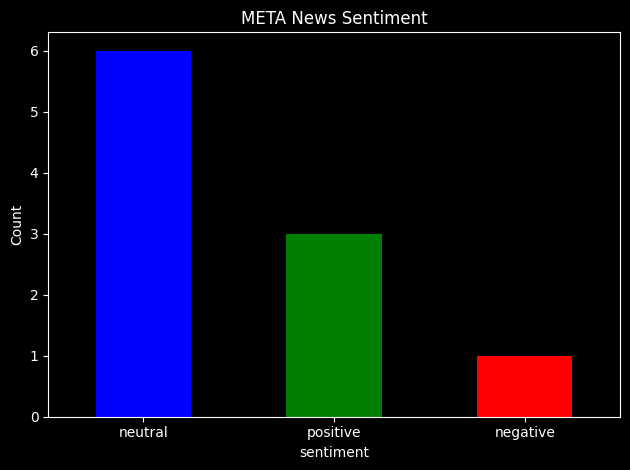

In [9]:
# Visualize sentiment
sentiment_counts = df["sentiment"].value_counts()
sentiment_counts.plot(kind="bar", title=f"{ticker} News Sentiment", color=["blue", "green", "red"])
plt.ylabel("Count")
plt.xticks(rotation=0)  # Set x-axis labels to horizontal
plt.tight_layout()      # Adjust layout to prevent clipping
plt.savefig(f"{ticker}_sentiment_counts.png")
plt.show()